<a href="https://colab.research.google.com/github/juliosdutra/FundamentosComputacionais/blob/main/Exemplos_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas**

Pandas é uma biblioteca de código aberto para a linguagem Python, criada com o objetivo de facilitar a análise e manipulação de dados. Com ela, é possível ler, organizar, limpar, transformar e visualizar dados de forma eficiente e intuitiva.

**🕰️ Breve histórico**

A biblioteca foi criada em 2008 por Wes McKinney, enquanto trabalhava no setor financeiro. Ele sentia falta de uma ferramenta poderosa para análise de dados estatísticos em Python, semelhante ao que já existia em linguagens como R e MATLAB. Desde então, Pandas se tornou uma das bibliotecas mais populares no ecossistema Python, sendo amplamente utilizada nas áreas de ciência de dados, engenharia e finanças.

**⚙️ Por que isso importa na Engenharia Química?**

Lidamos constantemente com grandes volumes de dados vindos de:

* Processos industriais (temperatura, pressão, vazão, concentração etc.)
* Laboratórios e bancadas experimentais
* Simulações numéricas e modelos matemáticos
* Sistemas de controle e instrumentação
* Dados ambientais e de qualidade de produto

**🔧 Aprender Pandas permite:**

* Importar dados de arquivos .csv, .xlsx ou bancos de dados
* Tratar valores ausentes e detectar inconsistências
* Calcular estatísticas, médias móveis e correlações
* Preparar conjuntos de dados para simulações, visualizações e controle
* Automatizar rotinas de análise de processo

> Por isso, dominar o Pandas é um passo essencial para quem deseja aplicar ciência de dados na engenharia. Ele conecta os dados da prática com a capacidade de análise computacional — transformando tabelas brutas em decisões técnicas fundamentadas.

# Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print('Versão do Pandas:', pd.__version__)

Versão do Pandas: 2.2.2


# Compreender o que são Series e DataFrame

* `Series`: é como uma coluna única com rótulo (index), parecida com um vetor.
> `pandas.Series(data, index, dtype, name)`

* `DataFrame`: é como uma tabela de dados, formada por várias colunas (como uma planilha do Excel)
> `pandas.DataFrame(data, index , columns , dtype)`

## Criando uma Series

In [2]:
s = pd.Series([15.1, 22.7, 30.5], name = 'Temperatura')
s

,Temperatura
0,15.1
1,22.7
2,30.5


In [3]:
dados = {'Componente A': 10, 'Componente B': 18, 'Componente C': 13}
ser = pd.Series(data=dados, index=dados.keys(), name='Quantidade')
ser

,Quantidade
Componente A,10
Componente B,18
Componente C,13


## Criando um DataFrame

> Use comandos como `df.head()`, `df.info()` e `df.describe()` para explorar os dados

In [4]:
# Construindo a partir de um dicionário
dados = {
    'Col1': [20, 22, 19],
    'Col2': [1.0, 0.95, 1.05]
}

df1 = pd.DataFrame(dados)
df1

,Col1,Col2
0,20,1.00
1,22,0.95
2,19,1.05


In [5]:
# Construindo a partir de uma matriz
dados = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])


df2 = pd.DataFrame(dados, index = ['L1', 'L2', 'L3'], columns=['Col1', 'Col2', 'Col3'])
df2

,Col1,Col2,Col3
L1,1,2,3
L2,4,5,6
L3,7,8,9


In [6]:
# Nomeando os indíces e colunas
notas = np.array([[10,  9.1, 9.7],
                  [9.8, 10, 9.4],
                  [8.2, 8.8, 9.2]])

df3 = pd.DataFrame(notas, index=['João', 'Maria', 'José'], columns=['Prova 1', 'Prova 2', 'Prova 3'])
df3

,Prova 1,Prova 2,Prova 3
João,10.0,9.1,9.7
Maria,9.8,10.0,9.4
José,8.2,8.8,9.2


## Exibindo valores

Isso retorna um DataFrame com os valores da coluna "Prova 1", mantendo os nomes dos alunos como índice.

In [7]:
df3[['Prova 1']]

,Prova 1
João,10.0
Maria,9.8
José,8.2


Agora isso retorna todas as colunas (Prova 1, Prova 2 e Prova 3) para a aluna Maria.

In [8]:
df3.loc[['Maria']]

,Prova 1,Prova 2,Prova 3
Maria,9.8,10.0,9.4


Se quiser acessar uma única célula, por exemplo, a nota da Maria na Prova 2:

In [9]:
df3.loc['Maria', 'Prova 2']  # retorna 8.5

np.float64(10.0)

## Adicionando novas linhas

In [10]:
df3.loc['Ana'] = [9.5, 9.0, 10.0]
df3

,Prova 1,Prova 2,Prova 3
João,10.0,9.1,9.7
Maria,9.8,10.0,9.4
José,8.2,8.8,9.2
Ana,9.5,9.0,10.0


## Adicionando colunas novas

In [11]:
# Adiciona a média
df3['Média'] = df3[['Prova 1', 'Prova 2', 'Prova 3']].mean(axis=1).round(1)
df3

,Prova 1,Prova 2,Prova 3,Média
João,10.0,9.1,9.7,9.6
Maria,9.8,10.0,9.4,9.7
José,8.2,8.8,9.2,8.7
Ana,9.5,9.0,10.0,9.5


#  Explorar e manipular dados reais

1. 📂 **Leitura de dados**

Aprenda a importar dados de arquivos `.csv`, `.xlsx`, `.txt` ou até da internet.

```python
import pandas as pd

df = pd.read_csv('dados_processos.csv')
df.head()
```

Existem vários conjuntos de dados públicos e didáticos que você pode carregar facilmente com o Pandas diretamente da internet — sem precisar baixar nada manualmente.


In [12]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_titanic = pd.read_csv(url)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Podemos também ler diretamente o arquivo `cstr_dados.xlsx`, que está hospedado no GitHub, usando o link "raw" para que o `pandas.read_excel()` consiga ler.

> **⚠️ Observação:**
Se o arquivo tiver múltiplas planilhas, você pode especificar qual aba (sheet) deseja ler.

In [14]:
url = 'https://raw.githubusercontent.com/juliosdutra/FundamentosComputacionais/main/cstr_dados.xlsx'
df = pd.read_excel(url)

2. 👀 **Exploração inicial do DataFrame**

Use funções para examinar rapidamente os dados.

In [15]:
df.head()      # Primeiras linhas

,Unnamed: 0,Vazao,Conc_inicial,Volume,Conc_A,Conc_B
0,0,1.000000,2.000000,10.000000,0.648840,1.353910
1,1,1.020101,2.027638,10.010050,0.818326,1.203164
2,2,1.040201,2.055276,10.020101,0.955901,1.096501
3,3,1.060302,2.082915,10.030151,0.973125,1.100076
4,4,1.080402,2.110553,10.040201,0.918787,1.183827


In [16]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [17]:
df.info()      # Tipos e nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    200 non-null    int64  
 1   Vazao         200 non-null    float64
 2   Conc_inicial  200 non-null    float64
 3   Volume        200 non-null    float64
 4   Conc_A        200 non-null    float64
 5   Conc_B        200 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


In [18]:
df.describe()  # Estatísticas básicas

,Unnamed: 0,Vazao,Conc_inicial,Volume,Conc_A,Conc_B
count,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000
mean,99.500000,3.000000,4.750000,11.0000,3.175088,1.574407
std,57.879185,1.163401,1.599676,0.5817,1.420027,0.191343
min,0.000000,1.000000,2.000000,10.0000,0.648840,1.096501
25%,49.750000,2.000000,3.375000,10.5000,1.928555,1.436384
50%,99.500000,3.000000,4.750000,11.0000,3.133455,1.595161
75%,149.250000,4.000000,6.125000,11.5000,4.386620,1.729719
max,199.000000,5.000000,7.500000,12.0000,5.674318,1.891668


3. **🎯 Seleção de dados**

Filtrar colunas, linhas e subconjuntos usando:

* `df['coluna']`, `df[['coluna1', 'coluna2']]`
* `df.loc[linha, coluna]`
* `df.iloc[i, j]`

In [19]:
df[['Vazao', 'Conc_A']]

,Vazao,Conc_A
0,1.000000,0.648840
1,1.020101,0.818326
2,1.040201,0.955901
3,1.060302,0.973125
4,1.080402,0.918787
...,...,...
195,4.919598,5.567422
196,4.939698,5.593279
197,4.959799,5.566333
198,4.979899,5.674318


In [20]:
df.loc[0:10,'Volume']

,Volume
0,10.000000
1,10.010050
2,10.020101
3,10.030151
4,10.040201
5,10.050251
6,10.060302
7,10.070352
8,10.080402
9,10.090452


In [21]:
df_titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [22]:
sobreviventes_por_sexo = pd.crosstab(df_titanic['Sex'], df_titanic['Survived'])
sobreviventes_por_sexo.columns = ['Não sobreviveu', 'Sobreviveu']
sobreviventes_por_sexo

,Não sobreviveu,Sobreviveu
Sex,,
female,81,233
male,468,109


4. **🔄 Limpeza e tratamento**

* Renomear colunas
* Remover ou preencher dados ausentes (`NaN`)
* Converter tipos (`astype`)
* Aplicar funções (`apply`, `map`)

> **⚠️ Observação:**
Em muitos conjuntos de dados reais, você vai encontrar valores ausentes (representados como `NaN` no Pandas). Esses valores podem atrapalhar análises, gráficos e cálculos estatísticos — por isso é importante tratá-los com cuidado

*  Verificando dados ausentes: `df.isnull().sum()`

* Preenchendo valores ausentes:
  * `df.fillna(0)`  # Substitui todos os NaN por zero
  * `df['Temperatura'].fillna(df['Temperatura'].mean())`  # Usa a média da coluna

Pode ser usado para preencher com:
 * Média (`mean()`), mediana (`median()`), moda (`mode()`),
 * Valor fixo (`0`, `"desconhecido"`, etc.)
 * Ou o valor anterior ou seguinte (`method='ffill'` ou `'bfill'`)

* Removendo valores ausentes: `df.dropna()`
 * `df.dropna()`  # Remove todas as linhas com pelo menos um NaN
 * `df.dropna(subset=['Temperatura'])`  # Remove apenas se a coluna específica estiver com NaN



 > 💡 **Dica**:
Use inplace=True se quiser modificar o DataFrame original: `df.dropna(inplace=True)`

In [23]:
# removendo uma coluna indesejada
df_novo = df.drop('Unnamed: 0', axis=1)
df_novo

,Vazao,Conc_inicial,Volume,Conc_A,Conc_B
0,1.000000,2.000000,10.000000,0.648840,1.353910
1,1.020101,2.027638,10.010050,0.818326,1.203164
2,1.040201,2.055276,10.020101,0.955901,1.096501
3,1.060302,2.082915,10.030151,0.973125,1.100076
4,1.080402,2.110553,10.040201,0.918787,1.183827
...,...,...,...,...,...
195,4.919598,7.389447,11.959799,5.567422,1.819610
196,4.939698,7.417085,11.969849,5.593279,1.825120
197,4.959799,7.444724,11.979899,5.566333,1.886729
198,4.979899,7.472362,11.989950,5.674318,1.798932


In [24]:
# Verificando se há alguma dados ausente
df.isnull().values.any()
df.isnull().sum()

,0
Unnamed: 0,0
Vazao,0
Conc_inicial,0
Volume,0
Conc_A,0
Conc_B,0


In [25]:
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


5. **📊 Análises e operações**

* Operações matemáticas com colunas
* Criação de novas colunas
* Agrupamentos com `groupby`
* Estatísticas por grupo
* Ordenações (`sort_values`)

In [26]:
df_novo['Tempo'] = 0.25*df_novo.index
df_novo['Mols_A'] = df_novo['Conc_A'] * df_novo['Volume']
df_novo['Mols_B'] = df_novo['Conc_B'] * df_novo['Volume']
df_novo

,Vazao,Conc_inicial,Volume,Conc_A,Conc_B,Tempo,Mols_A,Mols_B
0,1.000000,2.000000,10.000000,0.648840,1.353910,0.00,6.488404,13.539102
1,1.020101,2.027638,10.010050,0.818326,1.203164,0.25,8.191486,12.043731
2,1.040201,2.055276,10.020101,0.955901,1.096501,0.50,9.578229,10.987053
3,1.060302,2.082915,10.030151,0.973125,1.100076,0.75,9.760592,11.033929
4,1.080402,2.110553,10.040201,0.918787,1.183827,1.00,9.224803,11.885860
...,...,...,...,...,...,...,...,...
195,4.919598,7.389447,11.959799,5.567422,1.819610,48.75,66.585252,21.762167
196,4.939698,7.417085,11.969849,5.593279,1.825120,49.00,66.950703,21.846414
197,4.959799,7.444724,11.979899,5.566333,1.886729,49.25,66.684106,22.602827
198,4.979899,7.472362,11.989950,5.674318,1.798932,49.50,68.034782,21.569102


In [27]:
taxa_sobrevivencia = df_titanic.groupby('Sex')['Survived'].mean()
taxa_sobrevivencia

,Survived
Sex,
female,0.742038
male,0.188908


6. **🔗 Junções e mesclagens**

Unir diferentes tabelas com: `merge()`, `join()`, `concat()`

7. **📈 Visualização de dados**

Plotagens rápidas com Pandas + integração com Matplotlib e Seaborn.

Quando você usa `df.plot()` no Pandas, o eixo x e o y podem ser definidos de forma automática ou manual.

<Axes: >

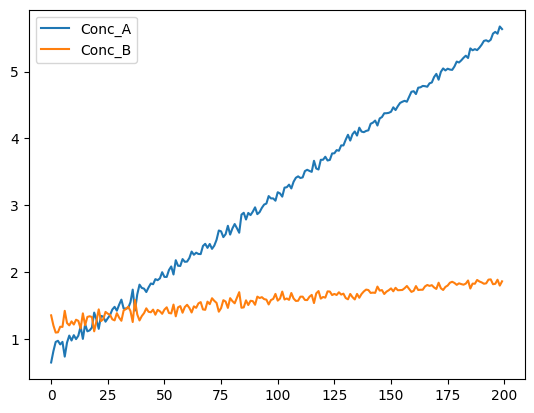

In [28]:
df[['Conc_A', 'Conc_B']].plot()

Especificando x e y manualmente:

<Axes: xlabel='Tempo'>

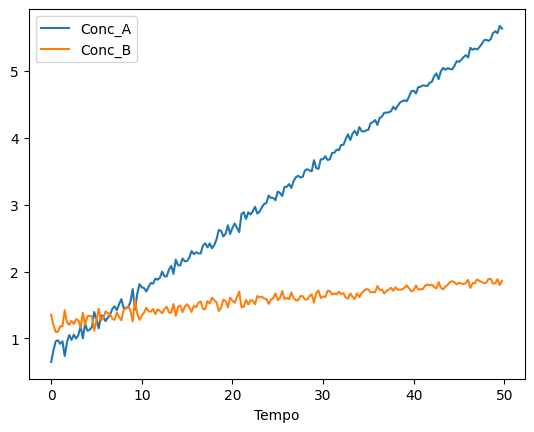

In [29]:
df_novo.plot(x='Tempo', y=['Conc_A', 'Conc_B'])

Você pode adicionar título, rótulos de eixo, legenda, estilo de linha, cores, grade e muito mais.

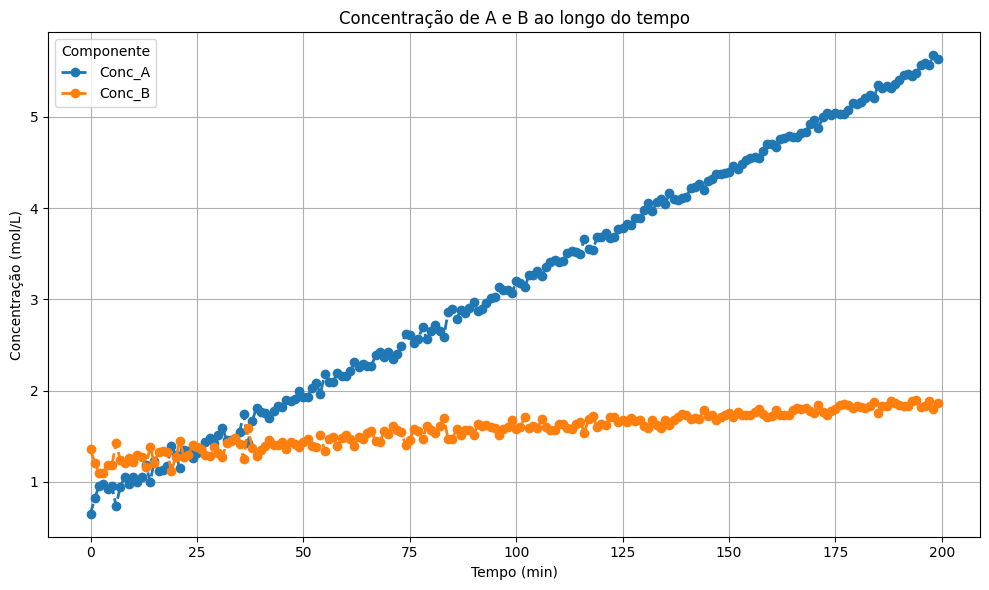

In [30]:
df[['Conc_A', 'Conc_B']].plot(
    kind='line',
    linewidth=2,
    linestyle='--',
    marker='o',
    color=['C0', 'C1'],
    figsize=(10, 6)
)

plt.title('Concentração de A e B ao longo do tempo')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (mol/L)')
plt.grid(True)
plt.legend(title='Componente')
plt.tight_layout()
plt.show()


Também é possível anotar valores no gráfico.

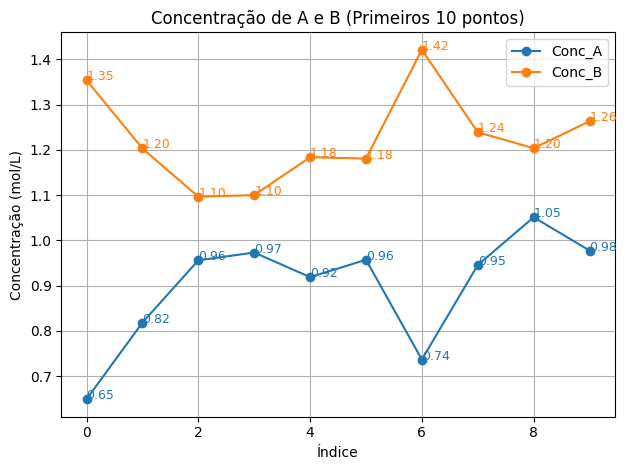

In [31]:
# Seleciona apenas as 10 primeiras linhas
df_subset = df.head(10)

# Plota os dados
ax = df_subset[['Conc_A', 'Conc_B']].plot(marker='o')

# Anota os valores da coluna Conc_A
for i, val in enumerate(df_subset['Conc_A']):
    ax.text(i, val, f'{val:.2f}', fontsize=9, color='C0')

# Anota os valores da coluna Conc_A
for i, val in enumerate(df_subset['Conc_B']):
    ax.text(i, val, f'{val:.2f}', fontsize=9, color='C1')

plt.title('Concentração de A e B (Primeiros 10 pontos)')
plt.xlabel('Índice')
plt.ylabel('Concentração (mol/L)')
plt.grid(True)
plt.tight_layout()
plt.show()

Visualizar com gráfico de barras:

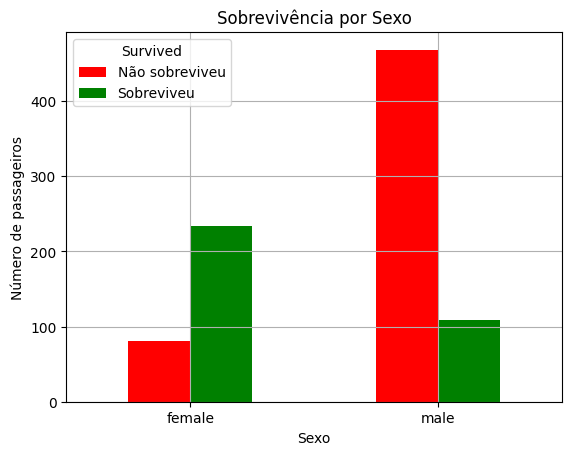

In [32]:
pd.crosstab(df_titanic['Sex'], df_titanic['Survived']) \
  .rename(columns={0: 'Não sobreviveu', 1: 'Sobreviveu'}) \
  .plot(kind='bar', color=['red', 'green'])

plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de passageiros')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


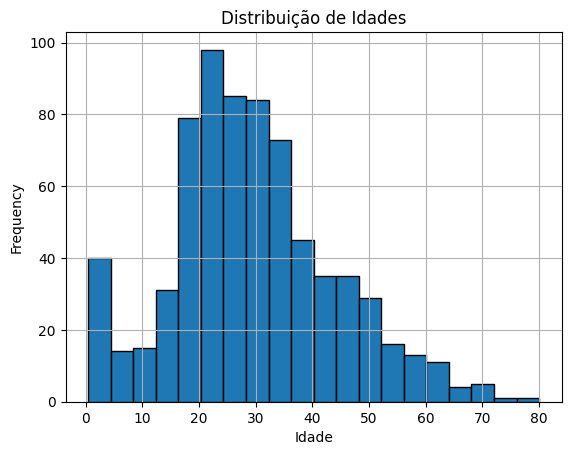

In [33]:
df_titanic['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.grid(True)
plt.show()

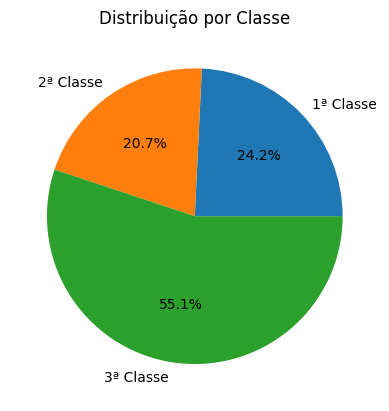

In [34]:
df_titanic['Pclass'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['1ª Classe', '2ª Classe', '3ª Classe'],
    ylabel='',
    title='Distribuição por Classe'
)
plt.show()

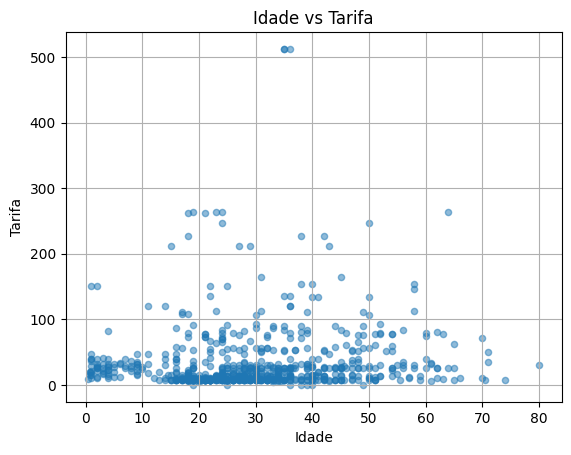

In [35]:
df_titanic.plot.scatter(x='Age', y='Fare', alpha=0.5)
plt.title('Idade vs Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.grid(True)
plt.show()


📈 Ajuste Linear com Pandas + NumPy


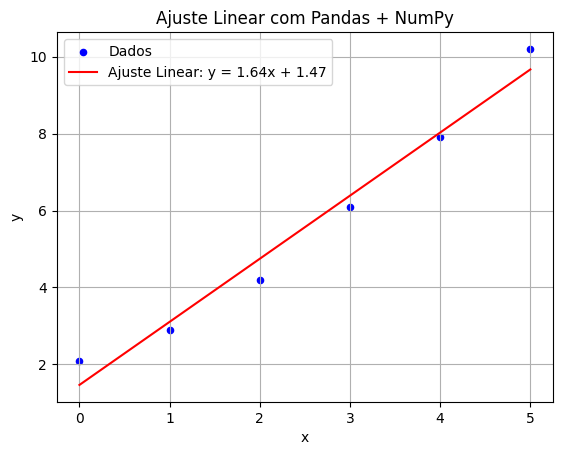

In [36]:

# Dados de exemplo
df_ex = pd.DataFrame({
    'x': [0, 1, 2, 3, 4, 5],
    'y': [2.1, 2.9, 4.2, 6.1, 7.9, 10.2]
})

# Ajuste linear com np.polyfit
coef = np.polyfit(df_ex['x'], df_ex['y'], deg=1)  # grau 1 = linear
a, b = coef

# Equação: y = a*x + b
df_ex['y_ajustada'] = a * df_ex['x'] + b

# Plot
ax = df_ex.plot.scatter(x='x', y='y', label='Dados', color='blue')
df_ex.plot(x='x', y='y_ajustada', label=f'Ajuste Linear: y = {a:.2f}x + {b:.2f}', color='red', ax=ax)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Linear com Pandas + NumPy')
plt.grid(True)
plt.show()

8. **🕒 Séries Temporais**

Manipulação de dados com datas: indexação por tempo, janelas móveis, reamostragem (`resample`), etc.



9. **Salvar o DataFrame em CSV ou Excel**

* Salvar como CSV (mais leve, compatível com qualquer software):

    `df.to_csv('dados_tratados.csv', index=False)`

    `index=False` evita salvar a coluna de índice (útil para arquivos mais limpos)

* Salvar como Excel (.xlsx):
    `df.to_excel('dados_tratados.xlsx', index=False)`

    * Também salva o DataFrame em uma planilha Excel moderna
    * Requer o pacote openpyxl (já vem instalado no Colab)

* Salvar múltiplos DataFrames em abas diferentes (Excel com múltiplas planilhas)

    ```python
    with pd.ExcelWriter('resultados.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Concentrações')
    df2.to_excel(writer, sheet_name='Médias')
    ```

> **📌 No Google Colab:** Para permitir que o usuário baixe o arquivo gerado:
```python
from google.colab import files
files.download('dados_tratados.xlsx')  # ou .csv
```

Se você quiser salvar apenas as colunas novas chamadas `Mols_A `e `Mols_B` do seu `DataFrame` `df_novo`, o procedimento é simples. Abaixo estão as instruções para salvar tanto em `.csv` quanto em `.xlsx`.

In [37]:
# Salvar como .csv
df_novo[['Mols_A', 'Mols_B']].to_csv('mols.csv', index=False)

In [38]:
# Salvar como .xlsx
df_novo[['Mols_A', 'Mols_B']].to_excel('mols.xlsx', index=False)

In [39]:
# Para baixar no Colab:
from google.colab import files
files.download('mols.xlsx')  # ou 'mols.csv'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>